In [1]:
import pandas as pd
import numpy as np 

from keras.models import Sequential 
from keras.layers import LSTM, Dense, Dropout

from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

/home/dtsc_swamy/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
df_train = pd.read_csv('nifty.csv')
df_train.head()
df_train.shape

,Date,Price,Open,High,Low,Vol.,Change %
0,22-Jul-10,"5,441.95","5,399.15","5,447.15","5,372.20",156.00M,0.79%
1,23-Jul-10,"5,449.10","5,441.90","5,477.50","5,435.15",165.93M,0.13%
2,26-Jul-10,"5,418.60","5,446.55","5,466.25","5,409.20",147.33M,-0.56%
3,27-Jul-10,"5,430.60","5,420.20","5,450.95","5,407.20",155.31M,0.22%
4,28-Jul-10,"5,397.55","5,436.10","5,447.85","5,386.25",146.94M,-0.61%


(2008, 7)

In [17]:
df_train.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [19]:
cols = ['Price', 'Open', 'High', 'Low']

df_train[cols]= df_train[cols].replace(',', '', regex=True).astype(float)


In [21]:
df_train.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,22-Jul-10,5441.95,5399.15,5447.15,5372.20,156.00M,0.79%
1,23-Jul-10,5449.10,5441.90,5477.50,5435.15,165.93M,0.13%
2,26-Jul-10,5418.60,5446.55,5466.25,5409.20,147.33M,-0.56%
3,27-Jul-10,5430.60,5420.20,5450.95,5407.20,155.31M,0.22%
4,28-Jul-10,5397.55,5436.10,5447.85,5386.25,146.94M,-0.61%


In [22]:
train_set = df_train.Open

In [6]:
train_set = df_train.iloc[:, 2:3].values
train_set

array([['5,399.15'],
       ['5,441.90'],
       ['5,446.55'],
       ...,
       ['11,437.15'],
       ['11,502.10'],
       ['11,581.40']], dtype=object)

In [7]:
sc = MinMaxScaler()
train_scale = sc.fit_transform(train_set)

ValueError: could not convert string to float: '11,581.40'

array(['5,399.15', '5,441.90', '5,446.55', ..., '11,437.15', '11,502.10',
       '11,581.40'], dtype=object)

In [7]:
# creating a data intrems input an doutput
xtr = train_scale[0:train_scale.shape[0]-1] #  xtr = train_scale[0:1257]
ytr = train_scale[1:train_scale.shape[0]] # ytr = train_scale[1:1258]

xtr = np.reshape(xtr, (1257, 1,1))

In [8]:
model = Sequential()
model.add(LSTM(units=4, activation = 'sigmoid', input_shape=(None,1)))
model.add(Dense(units=1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.fit(xtr, ytr, epochs = 500, batch_size=64)

Epoch 1/500
1257/1257 [==============================] - 0s 36us/step - loss: 0.0214
Epoch 2/500
1257/1257 [==============================] - 0s 34us/step - loss: 0.0206
Epoch 3/500
1257/1257 [==============================] - 0s 35us/step - loss: 0.0199
Epoch 4/500
1257/1257 [==============================] - 0s 33us/step - loss: 0.0192
Epoch 5/500
1257/1257 [==============================] - 0s 35us/step - loss: 0.0184
Epoch 6/500
1257/1257 [==============================] - 0s 35us/step - loss: 0.0177
Epoch 7/500
1257/1257 [==============================] - 0s 36us/step - loss: 0.0170
Epoch 8/500
1257/1257 [==============================] - 0s 35us/step - loss: 0.0164
Epoch 9/500
1257/1257 [==============================] - 0s 34us/step - loss: 0.0157
Epoch 10/500
1257/1257 [==============================] - 0s 34us/step - loss: 0.0151
Epoch 11/500
1257/1257 [==============================] - 0s 34us/step - loss: 0.0144
Epoch 12/500
1257/1257 [==============================] - 0s 35

1257/1257 [==============================] - 0s 34us/step - loss: 2.5405e-04
Epoch 185/500
1257/1257 [==============================] - 0s 34us/step - loss: 2.5413e-04
Epoch 186/500
1257/1257 [==============================] - 0s 33us/step - loss: 2.5449e-04
Epoch 187/500
1257/1257 [==============================] - 0s 33us/step - loss: 2.5430e-04
Epoch 188/500
1257/1257 [==============================] - 0s 35us/step - loss: 2.5398e-04
Epoch 189/500
1257/1257 [==============================] - 0s 33us/step - loss: 2.5484e-04
Epoch 190/500
1257/1257 [==============================] - 0s 33us/step - loss: 2.5356e-04
Epoch 191/500
1257/1257 [==============================] - 0s 33us/step - loss: 2.5366e-04
Epoch 192/500
1257/1257 [==============================] - 0s 33us/step - loss: 2.5381e-04
Epoch 193/500
1257/1257 [==============================] - 0s 33us/step - loss: 2.5346e-04
Epoch 194/500
1257/1257 [==============================] - 0s 33us/step - loss: 2.5304e-04
Epoch 195/500

1257/1257 [==============================] - 0s 34us/step - loss: 2.4658e-04
Epoch 365/500
1257/1257 [==============================] - 0s 33us/step - loss: 2.4669e-04
Epoch 366/500
1257/1257 [==============================] - 0s 32us/step - loss: 2.4635e-04
Epoch 367/500
1257/1257 [==============================] - 0s 33us/step - loss: 2.4536e-04
Epoch 368/500
1257/1257 [==============================] - 0s 33us/step - loss: 2.4677e-04
Epoch 369/500
1257/1257 [==============================] - 0s 32us/step - loss: 2.5146e-04
Epoch 370/500
1257/1257 [==============================] - 0s 32us/step - loss: 2.4625e-04
Epoch 371/500
1257/1257 [==============================] - 0s 33us/step - loss: 2.4641e-04
Epoch 372/500
1257/1257 [==============================] - 0s 34us/step - loss: 2.4822e-04
Epoch 373/500
1257/1257 [==============================] - 0s 34us/step - loss: 2.5506e-04
Epoch 374/500
1257/1257 [==============================] - 0s 33us/step - loss: 2.4938e-04
Epoch 375/500

In [16]:
df_test = pd.read_csv('Google_Stock_Price_Test.csv')
df_test = df_test.iloc[:, 1:2].values

test_scale = sc.transform(df_test)

test_scale.shape
test_scale = np.reshape(test_scale, (test_scale.shape[0], test_scale.shape[1], 1))

(20, 1)

In [17]:
predicted_stock = model.predict(test_scale)
predicted_stock = sc.inverse_transform(predicted_stock)

Text(0.5,1,'Google Stock Price Prediction')

Text(0.5,0,'Time')

Text(0,0.5,'Google Stock Price')

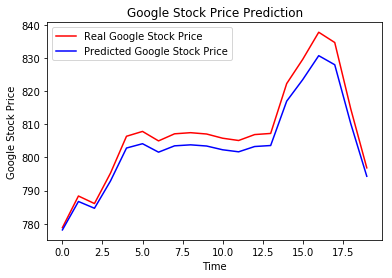

In [18]:
plt.plot(df_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

#  with 60 days time stamp

In [20]:
df_train = pd.read_csv('Google_Stock_Price_Train.csv')
df_train.head()
df_train.shape

train_set = df_train.iloc[:, 1:2].values

train_set[:5]

sc = MinMaxScaler()
train_scale = sc.fit_transform(train_set)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


(1258, 6)

array([[325.25],
       [331.27],
       [329.83],
       [328.34],
       [322.04]])

In [22]:
# input and Outut creation with 60 days time stamp

xtr = []
ytr = []

for i in range(60, 1258):
    xtr.append(train_scale[i-60:i, 0])
    ytr.append(train_scale[i,0])
xtr, ytr = np.array(xtr), np.array(ytr)

xtr[:2]
ytr[:2]


array([[0.08581368, 0.09701243, 0.09433366, 0.09156187, 0.07984225,
        0.0643277 , 0.0585423 , 0.06568569, 0.06109085, 0.06639259,
        0.0614257 , 0.07474514, 0.02797827, 0.02379269, 0.02409033,
        0.0159238 , 0.01078949, 0.00967334, 0.01642607, 0.02100231,
        0.02280676, 0.02273235, 0.02810849, 0.03212665, 0.0433812 ,
        0.04475779, 0.04790163, 0.0440695 , 0.04648783, 0.04745517,
        0.04873875, 0.03936305, 0.04137213, 0.04034898, 0.04784582,
        0.04325099, 0.04356723, 0.04286033, 0.04602277, 0.05398467,
        0.05738894, 0.05714711, 0.05569611, 0.04421832, 0.04514845,
        0.04605997, 0.04412531, 0.03675869, 0.04486941, 0.05065481,
        0.05214302, 0.05612397, 0.05818885, 0.06540665, 0.06882953,
        0.07243843, 0.07993526, 0.07846566, 0.08034452, 0.08497656],
       [0.09701243, 0.09433366, 0.09156187, 0.07984225, 0.0643277 ,
        0.0585423 , 0.06568569, 0.06109085, 0.06639259, 0.0614257 ,
        0.07474514, 0.02797827, 0.02379269, 0.0

array([0.08627874, 0.08471612])

In [23]:
xtr.shape
xtr = np.reshape(xtr, (xtr.shape[0], xtr.shape[1], 1))
xtr.shape

(1198, 60)

(1198, 60, 1)

In [24]:
model = Sequential()
model.add(LSTM(units=50, return_sequences = True, input_shape=(xtr.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences = False))

model.add(Dense(1))

model.compile(optimizer='adam', loss = 'mean_squared_error')

model.fit(xtr, ytr, epochs=50, batch_size=64)

Epoch 1/50
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0944
Epoch 2/50
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0106
Epoch 3/50
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0036
Epoch 4/50
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0030
Epoch 5/50
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0029
Epoch 6/50
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0026
Epoch 7/50
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0025
Epoch 8/50
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0026
Epoch 9/50
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0025
Epoch 10/50
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0027
Epoch 11/50
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0025
Epoch 12/50
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0025
E

In [25]:
df_test =   pd.read_csv('Google_Stock_Price_Test.csv')
test_set = df_test.iloc[:, 1:2].values

df_total = pd.concat((df_train.Open, df_test.Open), axis=0)
inputs = df_total[len(df_total)-len(df_test)-60: ].values
inputs.shape
inputs

(80,)

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [27]:
print(len(df_total)-len(df_test)-60)

1198


In [29]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
inputs.shape

(80, 1)

In [33]:
x_test = []
for i in range(60,80):
    x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [34]:
pred_stock  = model.predict(x_test)
pred_stock = sc.inverse_transform(pred_stock)

Text(0.5,1,'Google Stock Price Prediction')

Text(0.5,0,'Time')

Text(0,0.5,'Google Stock Price')

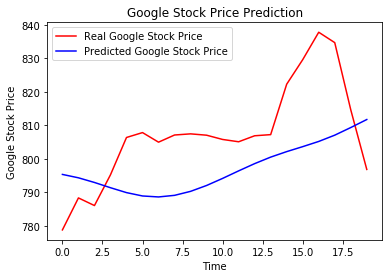

In [38]:
plt.plot(test_set, color = 'red', label = 'Real Google Stock Price')
plt.plot(pred_stock , color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()